# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [47]:
# Dependencies and Setup
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key (choose one option below)

# Option 1: Import from api_keys.py
from api_keys import weather_api_key

# Option 2: Directly assign the API key here
# weather_api_key = "51646574f1d475b83687474ef612a846"

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [48]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 595


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [8]:
import requests
import time

# API key and base URL
weather_api_key = "51646574f1d475b83687474ef612a846"
base_url = "http://api.openweathermap.org/data/2.5/weather?"

# Empty list to store city data
city_data = []

print("Beginning Data Retrieval")
print("-----------------------------")

record_count = 1
set_count = 1

for i, city in enumerate(cities):

    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # ✅ Create endpoint URL with each city
    city_url = f"{base_url}q={city}&appid={weather_api_key}&units=metric"

    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    record_count += 1

    try:
        # ✅ API request and JSON response
        city_weather = requests.get(city_url).json()

        # ✅ Parse the JSON
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # ✅ Append city data
        city_data.append({
            "City": city,
            "Lat": city_lat,
            "Lng": city_lng,
            "Max Temp": city_max_temp,
            "Humidity": city_humidity,
            "Cloudiness": city_clouds,
            "Wind Speed": city_wind,
            "Country": city_country,
            "Date": city_date
        })

    except Exception as e:
        print("City not found. Skipping...")
        pass

    time.sleep(1)  # avoid rate limiting

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")


Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | stanley
Processing Record 2 of Set 1 | tiksi
Processing Record 3 of Set 1 | yellowknife
Processing Record 4 of Set 1 | ribeira grande
Processing Record 5 of Set 1 | adamstown
Processing Record 6 of Set 1 | ust-nera
Processing Record 7 of Set 1 | chibougamau
Processing Record 8 of Set 1 | qaqortoq
Processing Record 9 of Set 1 | kudahuvadhoo
Processing Record 10 of Set 1 | itaituba
Processing Record 11 of Set 1 | albany
Processing Record 12 of Set 1 | waitangi
Processing Record 13 of Set 1 | la ronge
Processing Record 14 of Set 1 | jamestown
Processing Record 15 of Set 1 | ilulissat
Processing Record 16 of Set 1 | utrik
Processing Record 17 of Set 1 | wailua homesteads
Processing Record 18 of Set 1 | punta arenas
Processing Record 19 of Set 1 | bredasdorp
Processing Record 20 of Set 1 | kalemie
Processing Record 21 of Set 1 | vingt cinq
City not found. Skipping...
Processing Record 22 of Set 1 | port-au

In [10]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
# Show Record Count
city_data_df.count()

City          586
Lat           586
Lng           586
Max Temp      586
Humidity      586
Cloudiness    586
Wind Speed    586
Country       586
Date          586
dtype: int64

In [49]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,stanley,54.8680,-1.6985,6.80,90,0,0.00,GB,1746586277
1,tiksi,71.6872,128.8694,-3.81,84,100,2.45,RU,1746586279
2,yellowknife,62.4560,-114.3525,6.29,42,75,6.71,CA,1746585987
3,ribeira grande,38.5167,-28.7000,15.43,90,94,0.89,PT,1746586281
4,adamstown,-25.0660,-130.1015,24.76,77,4,4.24,PN,1746586282


In [50]:

# Export the City_Data into a csv
output_data_file = "WeatherPy_Database.csv"
city_data_df.to_csv(output_data_file, index_label=)
# Show the DataFrame

SyntaxError: expected argument value expression (2558994704.py, line 3)

In [ ]:

# Export the City_Data into a csv
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")
city_data_df.head()



,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,stanley,54.8680,-1.6985,6.80,90,0,0.00,GB,1746586277
1,tiksi,71.6872,128.8694,-3.81,84,100,2.45,RU,1746586279
2,yellowknife,62.4560,-114.3525,6.29,42,75,6.71,CA,1746585987
3,ribeira grande,38.5167,-28.7000,15.43,90,94,0.89,PT,1746586281
4,adamstown,-25.0660,-130.1015,24.76,77,4,4.24,PN,1746586282


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

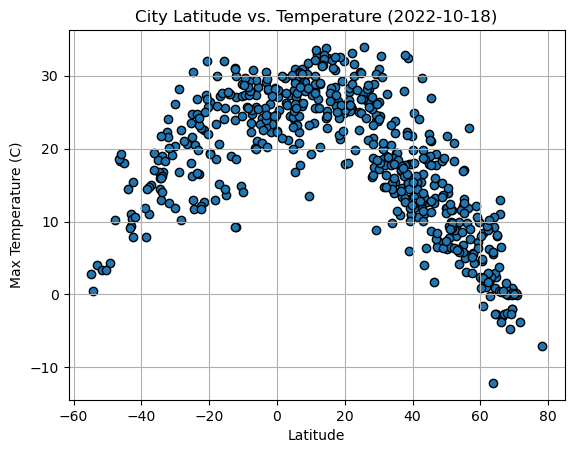

In [ ]:
# Build scatter plot for latitude vs. temperature
import matplotlib.pyplot as plt

plt.scatter(
    city_data_df['Lat'],  # Latitude data from your DataFrame
    city_data_df['Max Temp'],  # Max temperature data from your DataFrame
    marker='o',  # Marker style
    edgecolor='black'  # Add black edge color for better contrast
)

# Incorporate the graph properties
plt.title("City Latitude vs. Temperature (2022-10-18)")  # Add a title to the plot
plt.xlabel("Latitude")  # Label for x-axis
plt.ylabel("Max Temperature (C)")  # Label for y-axis
plt.grid(True)  # Show grid on the plot

# Save the figure to the 'output_data' directory
plt.savefig("output_data/Fig1.png")

# Show the plot
plt.show()


#### Latitude Vs. Humidity

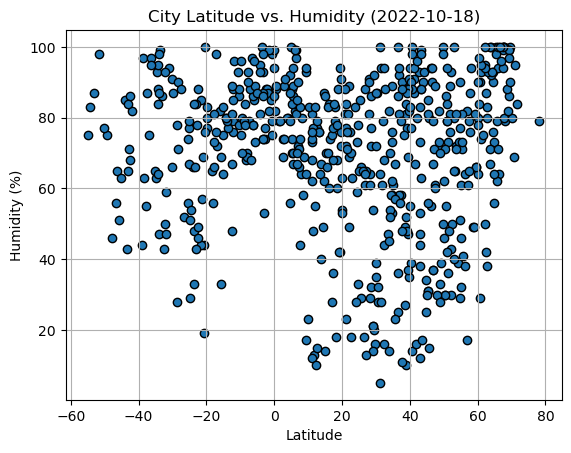

In [28]:
# Build the scatter plots for latitude vs. humidity
import matplotlib.pyplot as plt

# Assuming city_data_df already contains your data (Latitude and Humidity)
plt.scatter(
    city_data_df['Lat'],  # Latitude data from your DataFrame
    city_data_df['Humidity'],  # Humidity data from your DataFrame
    marker='o',  # Marker style
    edgecolor='black'  # Add black edge color for better contrast
)

# Incorporate the graph properties
plt.title("City Latitude vs. Humidity (2022-10-18)")  # Add a title to the plot
plt.xlabel("Latitude")  # Label for x-axis
plt.ylabel("Humidity (%)")  # Label for y-axis
plt.grid(True)  # Show grid on the plot

# Save the figure to the 'output_data' directory
plt.savefig("output_data/Fig2.png")

# Show the plot
plt.show()


#### Latitude Vs. Cloudiness

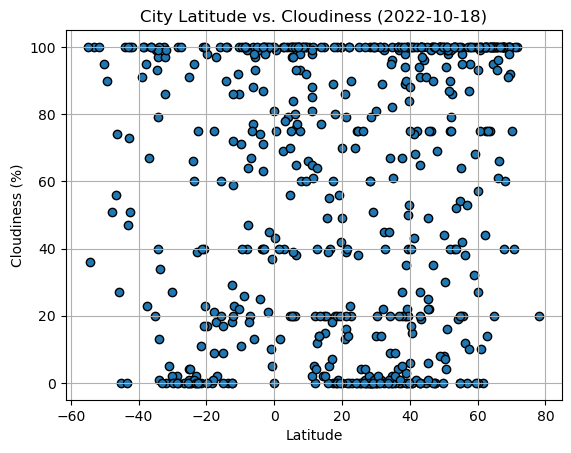

In [29]:
# Build the scatter plots for latitude vs. cloudiness
import matplotlib.pyplot as plt

# Assuming city_data_df already contains your data (Latitude and Cloudiness)
plt.scatter(
    city_data_df['Lat'],  # Latitude data from your DataFrame
    city_data_df['Cloudiness'],  # Cloudiness data from your DataFrame
    marker='o',  # Marker style
    edgecolor='black'  # Add black edge color for better contrast
)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2022-10-18)")  # Add a title to the plot
plt.xlabel("Latitude")  # Label for x-axis
plt.ylabel("Cloudiness (%)")  # Label for y-axis
plt.grid(True)  # Show grid on the plot

# Save the figure to the 'output_data' directory
plt.savefig("output_data/Fig3.png")

# Show the plot
plt.show()


#### Latitude vs. Wind Speed Plot

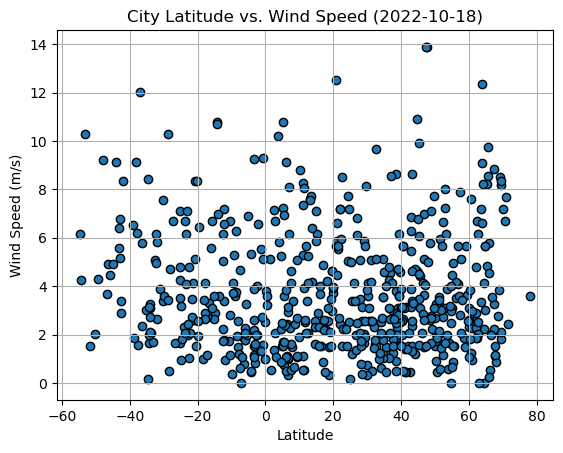

In [30]:
# Build the scatter plots for latitude vs. wind speed
import matplotlib.pyplot as plt

# Assuming city_data_df already contains your data (Latitude and Wind Speed)
plt.scatter(
    city_data_df['Lat'],  # Latitude data from your DataFrame
    city_data_df['Wind Speed'],  # Wind Speed data from your DataFrame
    marker='o',  # Marker style
    edgecolor='black'  # Add black edge color for better contrast
)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2022-10-18)")  # Add a title to the plot
plt.xlabel("Latitude")  # Label for x-axis
plt.ylabel("Wind Speed (m/s)")  # Label for y-axis
plt.grid(True)  # Show grid on the plot

# Save the figure to the 'output_data' directory
plt.savefig("output_data/Fig4.png")

# Show the plot
plt.show()


---

## Requirement 2: Compute Linear Regression for Each Relationship


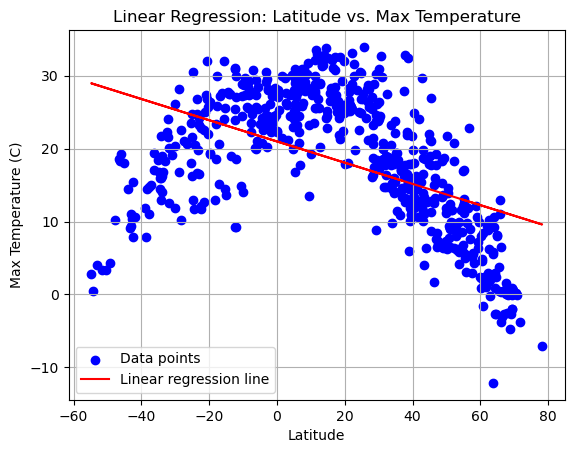

In [31]:
# Define a function to create Linear Regression plots
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# Function to create Linear Regression plots
def create_linear_regression_plot(x_data, y_data, x_label, y_label, title, output_filename):
    # Reshape data for Linear Regression
    x_data = x_data.values.reshape(-1, 1)  # Reshape the data to be 2D for sklearn
    
    # Create and fit the model
    model = LinearRegression()
    model.fit(x_data, y_data)
    
    # Predict values
    y_pred = model.predict(x_data)
    
    # Plot the data points
    plt.scatter(x_data, y_data, color='blue', label="Data points")
    
    # Plot the regression line
    plt.plot(x_data, y_pred, color='red', label="Linear regression line")
    
    # Incorporate other graph properties
    plt.title(title)  # Add the title to the plot
    plt.xlabel(x_label)  # Label for x-axis
    plt.ylabel(y_label)  # Label for y-axis
    plt.legend()  # Show the legend
    plt.grid(True)  # Display grid
    
    # Save the plot to a file
    plt.savefig(output_filename)
    
    # Show the plot
    plt.show()

# Example usage:
# Create a Linear Regression plot for 'Latitude' vs. 'Max Temp'
create_linear_regression_plot(
    city_data_df['Lat'],  # x_data (latitude)
    city_data_df['Max Temp'],  # y_data (max temperature)
    "Latitude",  # x-axis label
    "Max Temperature (C)",  # y-axis label
    "Linear Regression: Latitude vs. Max Temperature",  # title
    "output_data/linear_regression_lat_vs_temp.png"  # output file name
)


In [ ]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)

northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,stanley,54.8680,-1.6985,6.80,90,0,0.00,GB,1746586277
1,tiksi,71.6872,128.8694,-3.81,84,100,2.45,RU,1746586279
2,yellowknife,62.4560,-114.3525,6.29,42,75,6.71,CA,1746585987
3,ribeira grande,38.5167,-28.7000,15.43,90,94,0.89,PT,1746586281
5,ust-nera,64.5667,143.2000,2.36,76,95,2.21,RU,1746586283


In [34]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,adamstown,-25.0660,-130.1015,24.76,77,4,4.24,PN,1746586282
9,itaituba,-4.2761,-55.9836,24.17,95,99,0.46,BR,1746586287
11,waitangi,-43.9535,-176.5597,14.53,85,100,9.13,NZ,1746586289
17,punta arenas,-53.1500,-70.9167,4.06,87,100,10.29,CL,1746586013
18,bredasdorp,-34.5322,20.0403,14.40,93,93,0.16,ZA,1746586296


###  Temperature vs. Latitude Linear Regression Plot

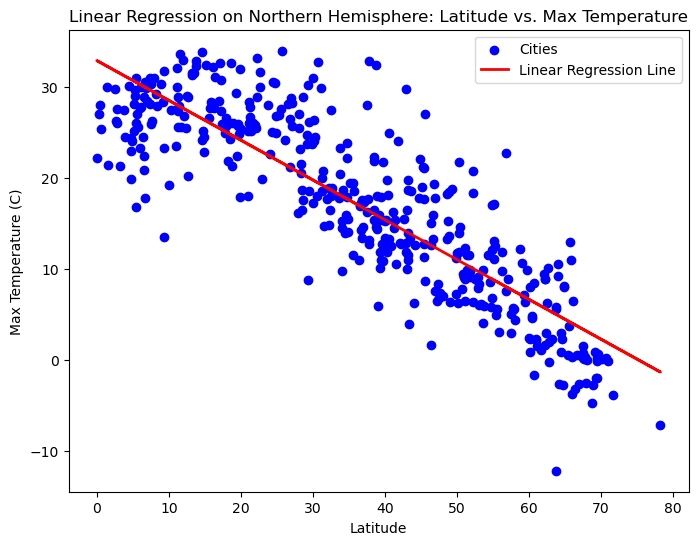

Slope (m): -0.43723694393885093
Intercept (b): 32.882190706847766


In [35]:
# Linear regression on Northern Hemisphere
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Extract the independent (X) and dependent (Y) variables
X = northern_hemi_df['Lat'].values.reshape(-1, 1)  # Latitude
Y = northern_hemi_df['Max Temp'].values  # Max Temperature

# Create the linear regression model
model = LinearRegression()

# Fit the model
model.fit(X, Y)

# Predict values using the model
y_pred = model.predict(X)

# Plotting the data points and the linear regression line
plt.figure(figsize=(8, 6))
plt.scatter(X, Y, color="blue", label="Cities")
plt.plot(X, y_pred, color="red", linewidth=2, label="Linear Regression Line")

# Add titles and labels
plt.title("Linear Regression on Northern Hemisphere: Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.legend()

# Show the plot
plt.show()

# Print the slope (coefficient) and intercept of the regression line
print(f"Slope (m): {model.coef_[0]}")
print(f"Intercept (b): {model.intercept_}")


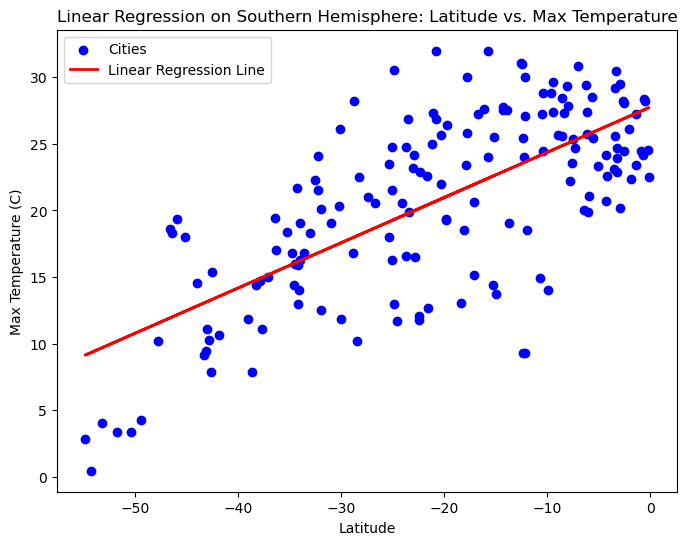

Slope (m): 0.34003901698087086
Intercept (b): 27.767355865946307


In [36]:
# Linear regression on Southern Hemisphere
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Extract the independent (X) and dependent (Y) variables
X_south = southern_hemi_df['Lat'].values.reshape(-1, 1)  # Latitude
Y_south = southern_hemi_df['Max Temp'].values  # Max Temperature

# Create the linear regression model
model_south = LinearRegression()

# Fit the model
model_south.fit(X_south, Y_south)

# Predict values using the model
y_pred_south = model_south.predict(X_south)

# Plotting the data points and the linear regression line for Southern Hemisphere
plt.figure(figsize=(8, 6))
plt.scatter(X_south, Y_south, color="blue", label="Cities")
plt.plot(X_south, y_pred_south, color="red", linewidth=2, label="Linear Regression Line")

# Add titles and labels
plt.title("Linear Regression on Southern Hemisphere: Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.legend()

# Show the plot
plt.show()

# Print the slope (coefficient) and intercept of the regression line
print(f"Slope (m): {model_south.coef_[0]}")
print(f"Intercept (b): {model_south.intercept_}")


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

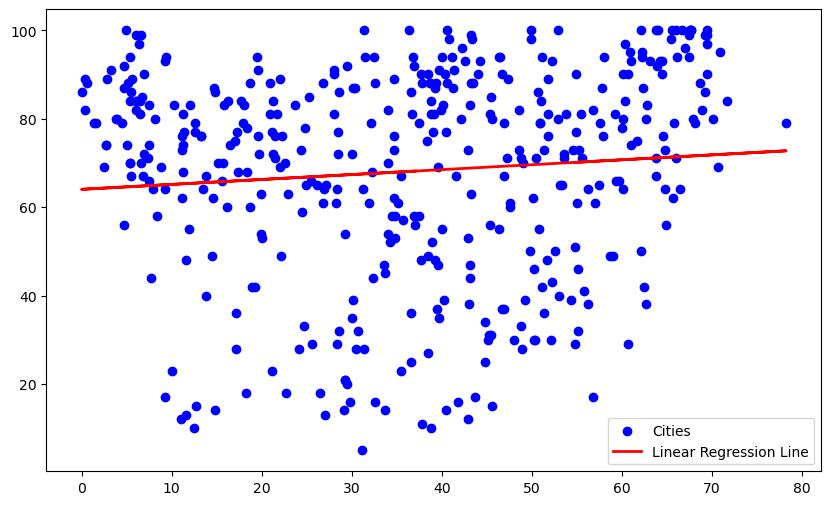

Text(0, 0.5, 'Humidity (%)')

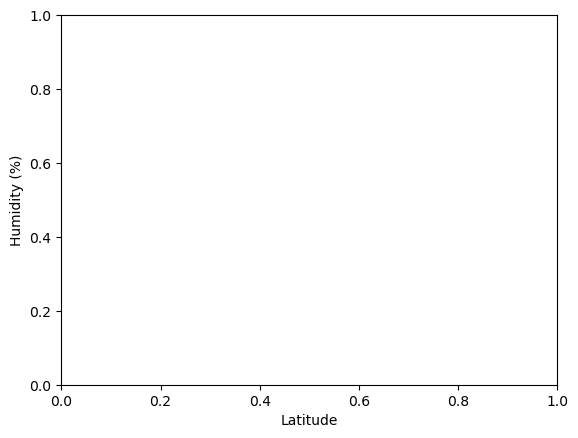

In [38]:
# Northern Hemisphere
# Import necessary libraries
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Define the function to create a Linear Regression plot
def linear_reg(x, y, fig_size):
    # Reshape the x values (latitude) into a 2D array for the model
    x = x.values.reshape(-1, 1)
    
    # Initialize the linear regression model
    model = LinearRegression()

    # Fit the model
    model.fit(x, y)

    # Predict values using the model
    y_pred = model.predict(x)

    # Plotting the data points and the linear regression line
    plt.figure(figsize=fig_size)
    plt.scatter(x, y, color="blue", label="Cities")
    plt.plot(x, y_pred, color="red", linewidth=2, label="Linear Regression Line")
    plt.legend()

    # Display the plot
    plt.show()

# Apply the linear_reg function to Northern Hemisphere data
linear_reg(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], (10, 6))

# Label the axes
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')


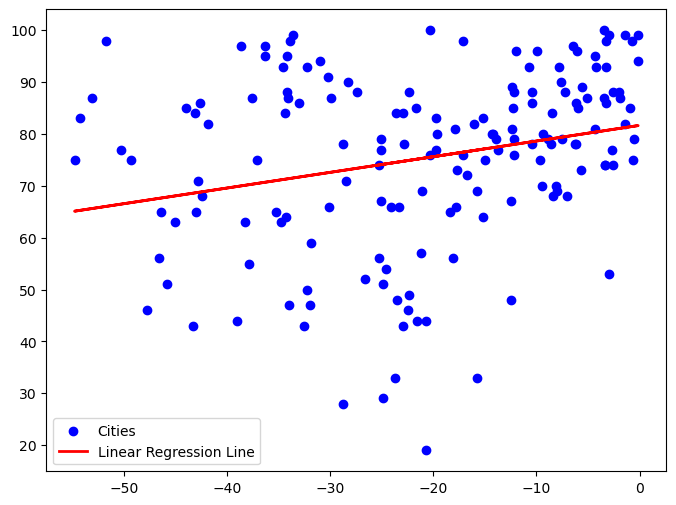

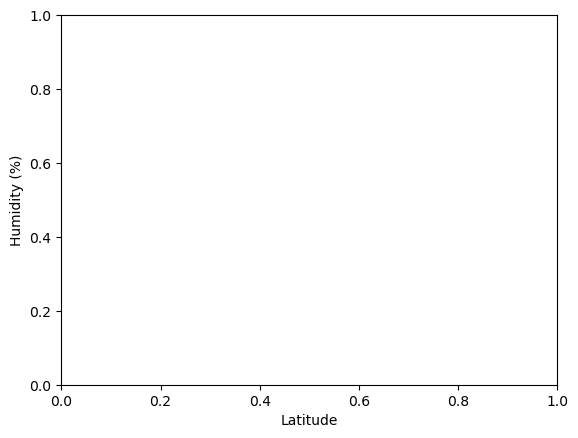

In [41]:
# Southern Hemisphere
# Apply the linear_reg function to Southern Hemisphere data with a valid fig_size
linear_reg(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], (8, 6))

# Label the axes
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# Show the plot
plt.show()



**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
In the northern hemisphere, there is a weak positive correlation (0.16) between latitude and humidity. This suggests that as latitude increases, there is a slight tendency for humidity to rise, although the relationship is not strong. Similarly, in the southern hemisphere, the correlation between latitude and humidity is even weaker (0.08), indicating that latitude has a very minimal effect on humidity, and any change in humidity with latitude is negligible.

### Cloudiness vs. Latitude Linear Regression Plot

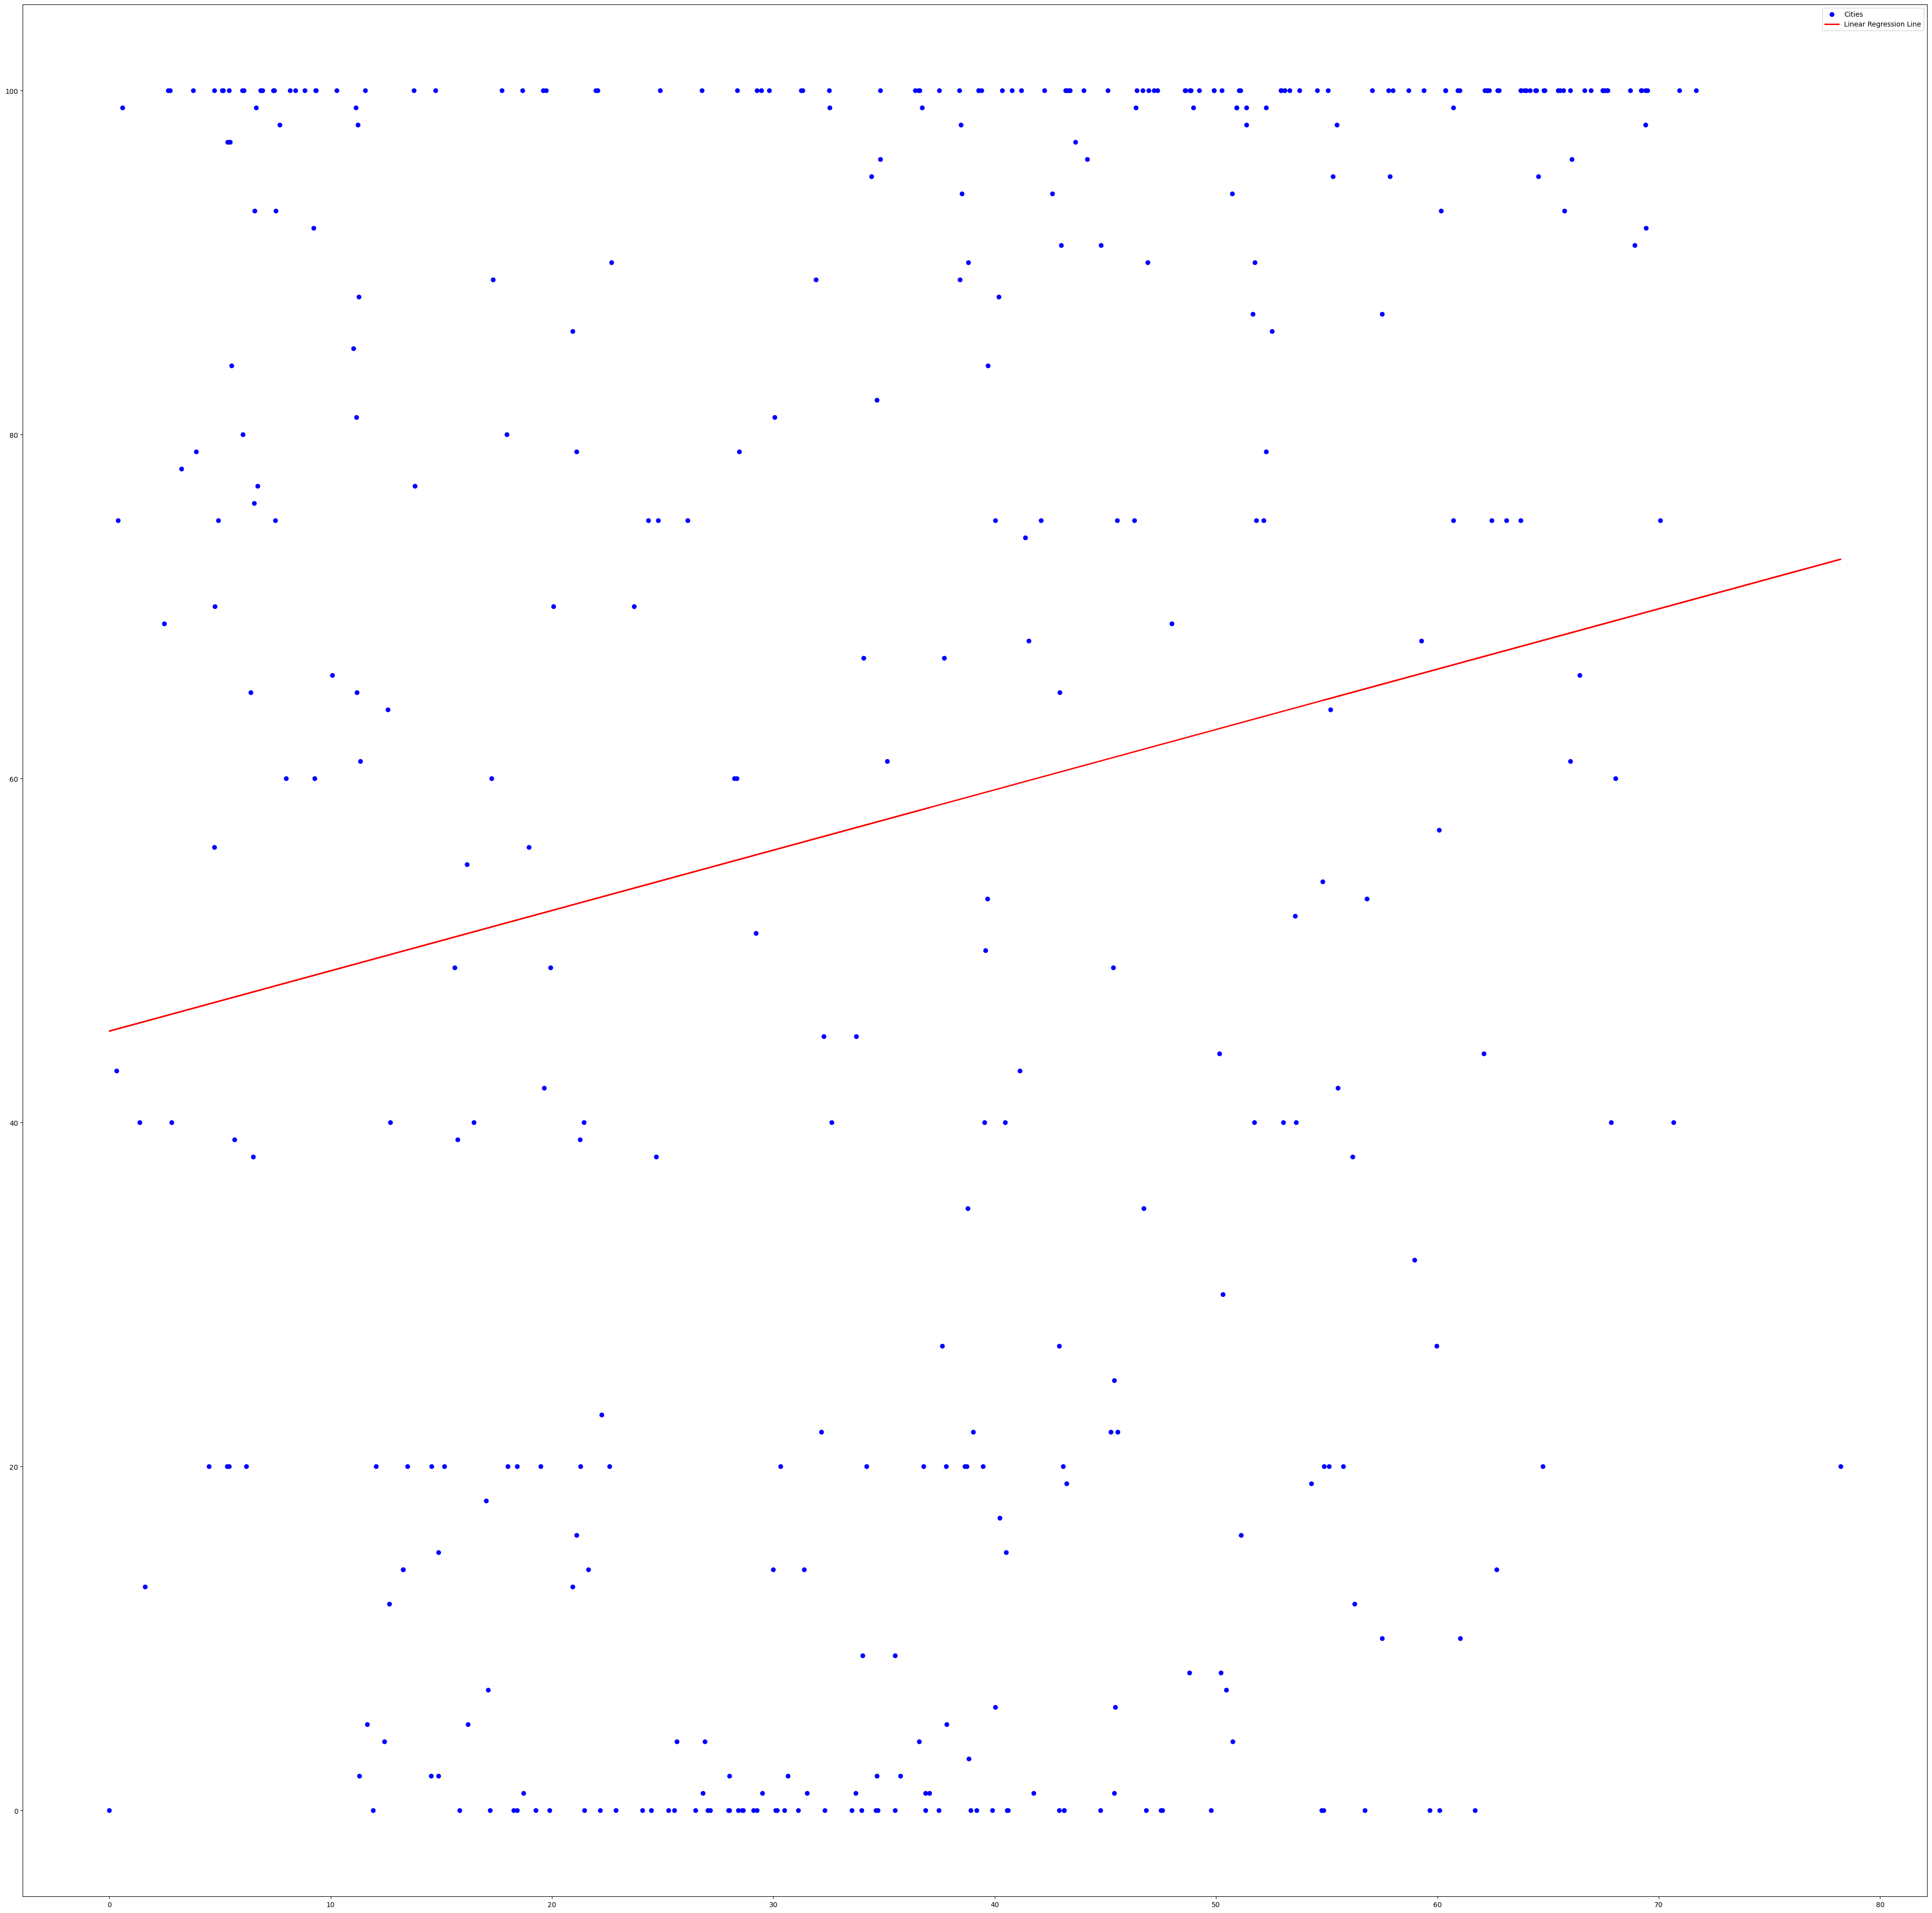

Text(0, 0.5, 'Cloudiness(%)')

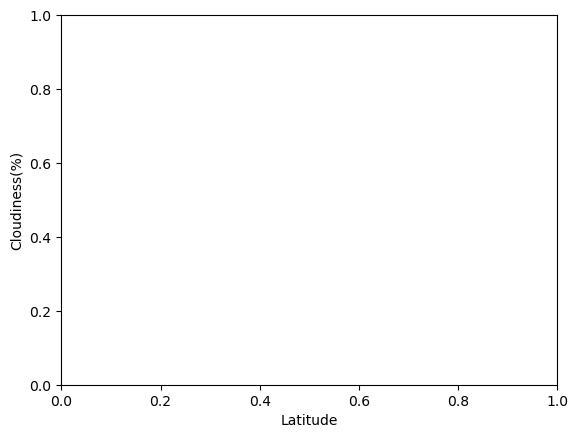

In [42]:
# Northern Hemisphere
linear_reg(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'],(50, 50))
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')

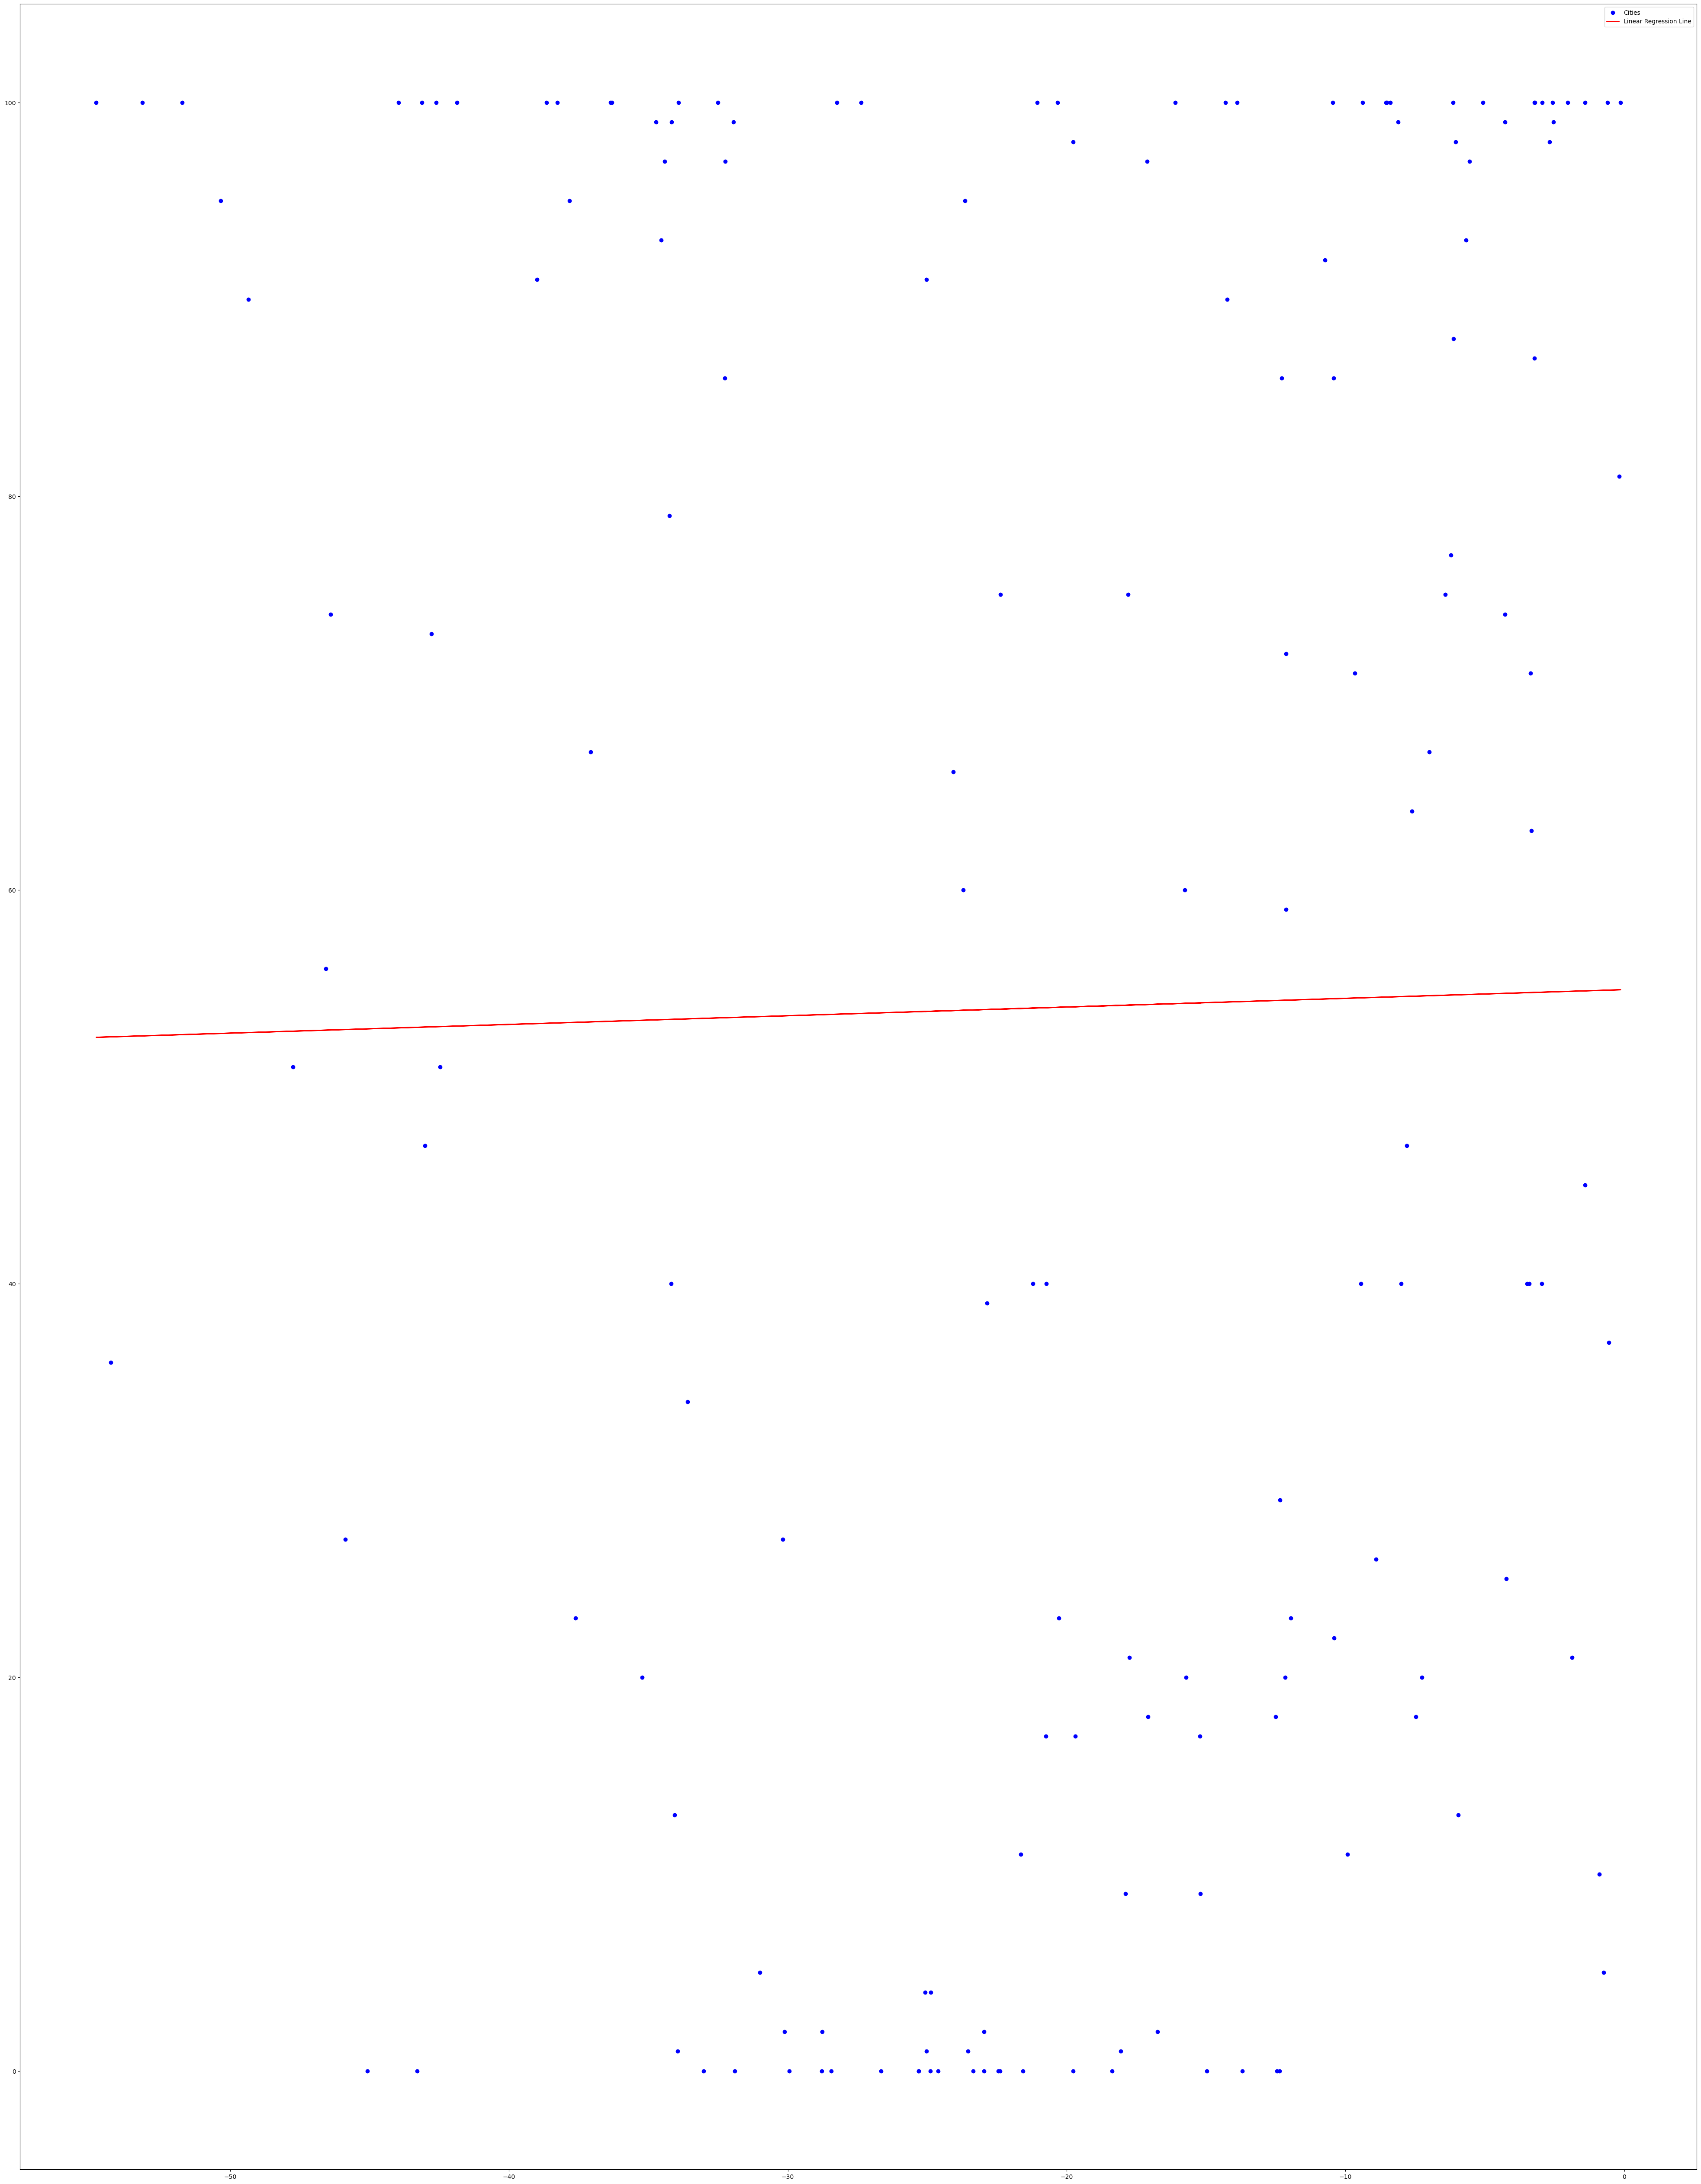

Text(0, 0.5, 'Cloudiness(%)')

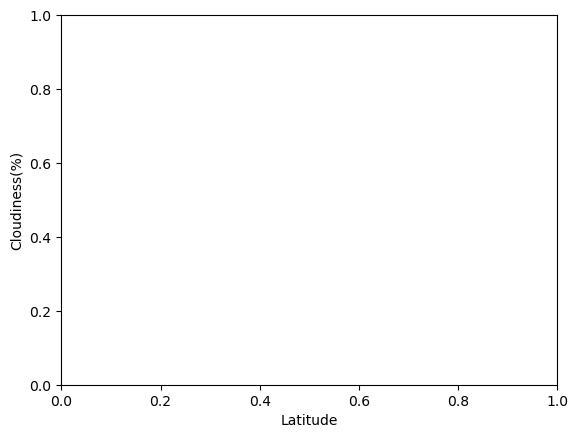

In [44]:
# Southern Hemisphere
linear_reg(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'],(50, 65))
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 0.0017236249523139959


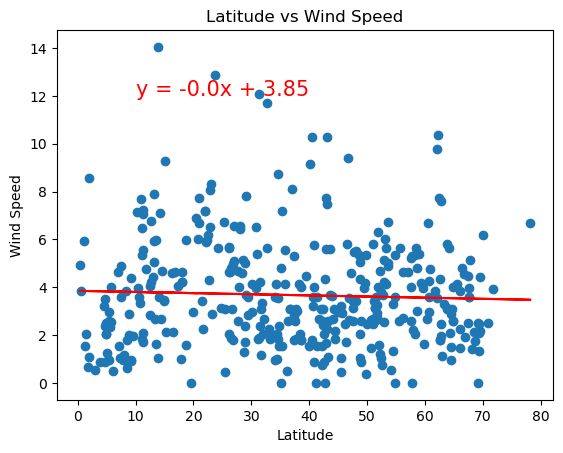

In [21]:
# Northern Hemisphere
# YOUR CODE HERE

The r^2-value is: 0.06495869418886388


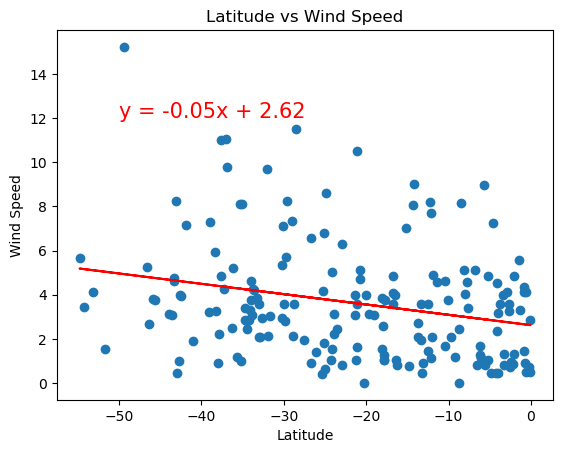

In [22]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE